1) IMPORT LIBRARIES

In [ ]:
!python -m spacy download el_core_news_sm 

In [ ]:
! pip install dateparser         #Parse dates written using natural language into python

import spacy

import requests                            
from bs4 import BeautifulSoup as soup  

import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
plt.style.use('ggplot')
import numpy as np 
import glob 
import re    
from datetime import datetime
import dateparser
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


2) READ THE CSV FILE & DATA PRE-PROCESSING

In [ ]:
from google.colab import drive      
drive.mount('/content/gdrive')

        #reading the csv 
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Scrape_dikaiologitika.csv") #parse_dates=['Time'], date_parser= dateparser.parse)      

Mounted at /content/gdrive


In [ ]:
df

,Title,Summary,Time
0,\nΕΦΚΑ: Παράταση στην υποβολή αιτήσεων για το ...,\n ...,23/06/2021 - 19:54
1,\nΑδέσμευτη Φωνή Υπαλλήλων ΟΑΕΔ: Πάνω από 30.0...,\n ...,23/06/2021 - 12:14
2,\nΟΑΕΔ: Ξεκινάνε οι αιτήσεις για τα e-learning...,\n ...,23/06/2021 - 10:41
3,\nΒγαίνουν τα αποτελέσματα για τον κοινωνικό τ...,\n ...,23/06/2021 - 06:56
4,\n«ΣΥΝ-ΕΡΓΑΣΙΑ»: Πως θα καταβληθεί το επίδομα ...,\n ...,23/06/2021 - 06:39
...,...,...,...
1995,\nΣΥΝΕΡΓΑΣΙΑ: Αλλαγές στα κριτήρια των εργαζομ...,\n ...,31/05/2021 - 19:37
1996,\nΤηλεργασία: Επιστρέφουν στις δουλειές τους ο...,\n ...,31/05/2021 - 17:50
1997,\nΟΑΕΔ: Τα αποτελέσματα για το πρόγραμμα με τη...,\n ...,31/05/2021 - 15:07
1998,\nΌλες οι πληρωμές επιδομάτων και συντάξεων απ...,\n ...,30/05/2021 - 15:32


In [ ]:
#converting 'Time' from str to datetime
df['Time'] = pd.to_datetime(df.Time , format='%d/%m/%Y - %H:%M')
df['Time']

In [ ]:
df['year'] = pd.DatetimeIndex(df['Time']).year
df['month'] = pd.DatetimeIndex(df['Time']).month
df['day'] = pd.DatetimeIndex(df['Time']).day
df

In [ ]:
#Set datetime as index
df.set_index('Time', inplace= True)
df

,Title,Summary,year,month,day
Time,,,,,
2021-06-23 19:54:00,\nΕΦΚΑ: Παράταση στην υποβολή αιτήσεων για το ...,\n ...,2021,6,23
2021-06-23 12:14:00,\nΑδέσμευτη Φωνή Υπαλλήλων ΟΑΕΔ: Πάνω από 30.0...,\n ...,2021,6,23
2021-06-23 10:41:00,\nΟΑΕΔ: Ξεκινάνε οι αιτήσεις για τα e-learning...,\n ...,2021,6,23
2021-06-23 06:56:00,\nΒγαίνουν τα αποτελέσματα για τον κοινωνικό τ...,\n ...,2021,6,23
2021-06-23 06:39:00,\n«ΣΥΝ-ΕΡΓΑΣΙΑ»: Πως θα καταβληθεί το επίδομα ...,\n ...,2021,6,23
...,...,...,...,...,...
2021-05-31 19:37:00,\nΣΥΝΕΡΓΑΣΙΑ: Αλλαγές στα κριτήρια των εργαζομ...,\n ...,2021,5,31
2021-05-31 17:50:00,\nΤηλεργασία: Επιστρέφουν στις δουλειές τους ο...,\n ...,2021,5,31
2021-05-31 15:07:00,\nΟΑΕΔ: Τα αποτελέσματα για το πρόγραμμα με τη...,\n ...,2021,5,31


In [ ]:
df.dtypes

In [ ]:
#converting data type from object to string
df['Summary']= df['Summary'].astype(str)

In [ ]:
#converting data type from object to string
df['Title']= df['Title'].astype(str)

In [ ]:
#print the whole summary(need some cleaning)
pd.set_option("display.max_colwidth", -1)
print(df['Summary'])

Time
2021-06-23 19:54:00    \n                                                Η υποβολή των αιτήσεων γίνεται στην ιστοσελίδα του ΕΦΚΑ και αφορά μία από τις πέντε κατασκηνωτικές περιόδους του φετινού καλοκαιριού\n                                                                                                                                                                        
2021-06-23 12:14:00    \n                                                Η προθεσμία για τις αιτήσεις ένταξης στις ευνοϊκές ρυθμίσεις αποπληρωμής οφειλών των δανειοληπτών ΟΕΚ με ταυτόχρονο κούρεμα αρχικού ποσού δανείου κατά 15% των δανείων λήγει σε λίγες ημέρες (30.6.2021), λεεί η αδέσμευτη φωνή του ΟΑΕΔ.\n                                                                   
2021-06-23 10:41:00    \n                                                Πρεμιέρα για τις αιτήσεις για τα e-learning κατάρτισης εργαζομένων ΛΑΕΚ. Στο πρόγραμμα μπορούν να λάβουν μέρος ιδιωτικές επιχειρήσεις και φορείς του Δημόσιου τομέα, πώς γ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
#print the whole heading (need some cleaning)
pd.set_option("display.max_colwidth", -1)
print(df['Title'])

In [ ]:
#Cleaning the text
def cleanTxt(text):
  text = re.sub(r'[^\w\s]', '', text)   #Removing puncuations
  text = text.lower()                     #Converting letters to lowercase
  text = text.replace('\xa0','')       #Removing \xa0 character(it means space)  
  text = text.replace('\t','')        #Removing \t character(similar to the indentation function in the document,Tab key) 
  text = text.replace('\n','')                                                                                          
  #text = re.sub('\d+', '', text)      #Removing numbers   
  text = text.strip()                 #Remove all whitespaces
# Return the cleaned text
  return text
#Clean the tweets
df['Summary'] = df['Summary'].apply(cleanTxt)
df['Title'] =  df['Title'].apply(cleanTxt)
#Show the cleaned tweets
df.head(100)

,Title,Summary,year,month,day
Time,,,,,
2021-06-23 19:54:00,εφκα παράταση στην υποβολή αιτήσεων για το κατασκηνωτικό πρόγραμμα του φετινού καλοκαιριού,η υποβολή των αιτήσεων γίνεται στην ιστοσελίδα του εφκα και αφορά μία από τις πέντε κατασκηνωτικές περιόδους του φετινού καλοκαιριού,2021,Jun,23
2021-06-23 12:14:00,αδέσμευτη φωνή υπαλλήλων οαεδ πάνω από δανειολήπτες τοεκ δεν έχουν κάνει αίτηση για ευνοϊκές ρυθμίσεις,η προθεσμία για τις αιτήσεις ένταξης στις ευνοϊκές ρυθμίσεις αποπληρωμής οφειλών των δανειοληπτών οεκ με ταυτόχρονο κούρεμα αρχικού ποσού δανείου κατά των δανείων λήγει σε λίγες ημέρες λεεί η αδέσμευτη φωνή του οαεδ,2021,Jun,23
2021-06-23 10:41:00,οαεδ ξεκινάνε οι αιτήσεις για τα elearning κατάρτισης εργαζομένων λαεκ,πρεμιέρα για τις αιτήσεις για τα elearning κατάρτισης εργαζομένων λαεκ στο πρόγραμμα μπορούν να λάβουν μέρος ιδιωτικές επιχειρήσεις και φορείς του δημόσιου τομέα πώς γίνεται η όλη διαδικασία υποβολής ελέγχου και αποπληρωμής των προγραμμάτων κατάρτισης,2021,Jun,23
2021-06-23 06:56:00,βγαίνουν τα αποτελέσματα για τον κοινωνικό τουρισμό του οαεδ,μέσα στις επόμενες ημέρες ίσως και αυτή την εβδομάδα αναμένεται να δημοσιοποιηθούν τα προσωρινά στοιχεία των δικαιούχων του κοινωνικού τουρισμού του οαεδ σύμφωνα με πληροφορίες του dnews,2021,Jun,23
2021-06-23 06:39:00,συνεργασια πως θα καταβληθεί το επίδομα αδείας στους εργαζόμενους,ξεκινάει σήμερα και μέχρι την δευτέρα ιουνίου η υποβολή των δηλώσεων για τον μηχανισμό συνεργασια του μαΐου β φάση,2021,Jun,23
...,...,...,...,...,...
2021-06-17 07:37:00,αλλάζουν όλα για τους εργαζόμενους στα ξενοδοχεία οι νέοι μισθοί και οι συμβάσεις που θα ισχύουν,κηρύσσεται υποχρεωτική η από συλλογικής σύμβασης εργασίας σσε για τους όρους αμοιβής και εργασίας των εργαζομένων στις ξενοδοχειακές επιχειρήσεις όλης της χώρας με απόφαση του υπουργού εργασίας και κοινωνικών υποθέσεων κωστή χατζηδάκη που πήρε φεκ,2021,Jun,17
2021-06-17 06:56:00,αποκλειστικό ξεκινούν οι αιτήσεις για το νέο πρόγραμμα κοινωφελούς εργασίας του οαεδ,ξεκινάει τον αύγουστο η διαδικασία για την υποβολή των αιτήσεων για το νέο πρόγραμμα κοινωφελούς εργασίας του οαεδ το οποίο όπως αποκάλυψε το dnews αφορά τελικά θέσεις εργασίας σε δήμους περιφέρειες και δημόσιους φορείς,2021,Jun,17
2021-06-17 06:45:00,οαεδ τέλος χρόνου για τον κοινωνικό τουρισμό,τελευταία ημέρα σήμερα για την υποβολή αιτήσεων για τις επιταγές του κοινωνικού τουρισμού του οαεδ η προθεσμία λήγει σήμερα στις και ήδη έχει ξεπεράσει ο αριθμός των αιτήσεων τις επιταγές,2021,Jun,17


In [ ]:
#convert from int to string(month name)
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)

4) NATURAL LANGUAGE PROCESSING

In [ ]:
#Greek language
nlp = spacy.load('el_core_news_sm')

In [ ]:
#Greek stopwords are included in this list
list(nlp.Defaults.stop_words)[0:10]

['ταύτην',
 'τέτοιος',
 'νωρίς',
 'οποιεσδήποτε',
 'κάμποσα',
 'συχνοί',
 'πούθε',
 'ανάμεσα',
 'μιαν',
 'μπορεί']

In [ ]:
GreekStopwords = nlp.Defaults.stop_words

In [ ]:
#Save the greek stopwords in a variable
NewStopWords = list(GreekStopwords)

In [ ]:
#Concatenate
title = df['Title'].str.cat(sep = ' ')
print(len(title), 'items')
title

142898 items


'εφκα παράταση στην υποβολή αιτήσεων για το κατασκηνωτικό πρόγραμμα του φετινού καλοκαιριού αδέσμευτη φωνή υπαλλήλων οαεδ πάνω από  δανειολήπτες τοεκ δεν έχουν κάνει αίτηση για ευνοϊκές ρυθμίσεις οαεδ ξεκινάνε οι αιτήσεις για τα elearning κατάρτισης εργαζομένων λαεκ βγαίνουν τα αποτελέσματα για τον κοινωνικό τουρισμό του οαεδ συνεργασια πως θα καταβληθεί το επίδομα αδείας στους εργαζόμενους υπ εργασίας μέτρα προστασίας των εργαζομένων από τον καύσωνα ανακοινώθηκαν έλεγχοι επίδομα  ευρώ όλες οι προθεσμίες για αναστολές στο εργανη τελευταία ευκαιρία για αποσπάσεις  μετατάξεις στο δημόσιο μέχρι σήμερα οι αιτήσεις επίδομα αδείας  ποιος θα το πληρώσει σε όσους ήταν σε αναστολή σύμβασης οαεδ καταγράφεται μείωση των εγγεγραμμένων ανέργων τον μάιο εικόνα οαεδ από τρίτη οι αιτήσεις επιχειρήσεων για το νέο πρόγραμμα επιδότησης  νέων θέσεων εργασίας αιφνιδιαστική επίσκεψη χατζηδάκη σε υποκατάστημα εφκα έλειπαν σχεδόν οι μισοί υπάλληλοι κοινωνικός τουρισμός  παράταση από τον οαεδ για καταλύματα κα

In [ ]:
summary = df['Summary'].str.cat(sep = ' ')
print(len(summary) , 'items')
summary

361705 items


'η υποβολή των αιτήσεων γίνεται στην ιστοσελίδα του εφκα και αφορά μία από τις πέντε κατασκηνωτικές περιόδους του φετινού καλοκαιριού η προθεσμία για τις αιτήσεις ένταξης στις ευνοϊκές ρυθμίσεις αποπληρωμής οφειλών των δανειοληπτών οεκ με ταυτόχρονο κούρεμα αρχικού ποσού δανείου κατά  των δανείων λήγει σε λίγες ημέρες  λεεί η αδέσμευτη φωνή του οαεδ πρεμιέρα για τις αιτήσεις για τα elearning κατάρτισης εργαζομένων λαεκ στο πρόγραμμα μπορούν να λάβουν μέρος ιδιωτικές επιχειρήσεις και φορείς του δημόσιου τομέα πώς γίνεται η όλη διαδικασία υποβολής ελέγχου και αποπληρωμής των προγραμμάτων κατάρτισης μέσα στις επόμενες ημέρες ίσως και αυτή την εβδομάδα αναμένεται να δημοσιοποιηθούν τα προσωρινά στοιχεία των δικαιούχων του κοινωνικού τουρισμού  του οαεδ σύμφωνα με πληροφορίες του dnews ξεκινάει σήμερα και μέχρι την δευτέρα  ιουνίου η υποβολή των δηλώσεων για τον μηχανισμό συνεργασια του μαΐου β φάση έλεγχοι ενόψει του καύσωνα για προστασία της ασφάλειας και υγείας των εργαζομένων ανακοίνωσε

In [ ]:
#merge summary + title together
whole_text = summary + title
print(len(whole_text) , 'items')
whole_text

504603 items


'η υποβολή των αιτήσεων γίνεται στην ιστοσελίδα του εφκα και αφορά μία από τις πέντε κατασκηνωτικές περιόδους του φετινού καλοκαιριού η προθεσμία για τις αιτήσεις ένταξης στις ευνοϊκές ρυθμίσεις αποπληρωμής οφειλών των δανειοληπτών οεκ με ταυτόχρονο κούρεμα αρχικού ποσού δανείου κατά  των δανείων λήγει σε λίγες ημέρες  λεεί η αδέσμευτη φωνή του οαεδ πρεμιέρα για τις αιτήσεις για τα elearning κατάρτισης εργαζομένων λαεκ στο πρόγραμμα μπορούν να λάβουν μέρος ιδιωτικές επιχειρήσεις και φορείς του δημόσιου τομέα πώς γίνεται η όλη διαδικασία υποβολής ελέγχου και αποπληρωμής των προγραμμάτων κατάρτισης μέσα στις επόμενες ημέρες ίσως και αυτή την εβδομάδα αναμένεται να δημοσιοποιηθούν τα προσωρινά στοιχεία των δικαιούχων του κοινωνικού τουρισμού  του οαεδ σύμφωνα με πληροφορίες του dnews ξεκινάει σήμερα και μέχρι την δευτέρα  ιουνίου η υποβολή των δηλώσεων για τον μηχανισμό συνεργασια του μαΐου β φάση έλεγχοι ενόψει του καύσωνα για προστασία της ασφάλειας και υγείας των εργαζομένων ανακοίνωσε

5) LEMMATIZATION: THE PROCESS OF RETURNING THE BASE OR DICTIONARY FORM OF A WORD (LEMMA)

In [ ]:
#print only the lemma for every word
full_text = nlp(whole_text)
for token in full_text:       
    print(token.lemma_)

In [ ]:
#Modify the full text by replacing every word with its lemma.
final_text = ' '.join(token.lemma_ for token in full_text)
final_text[5:200]

In [ ]:
#Store the clear/lemmatized full text in a variable
full_doc = nlp(final_text)
full_doc

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)
clear_text[50:200]


In [ ]:
clear_text

'η υποβολή των αιτήσεο γίνομαι στην ιστοσελίδα του εφκα και αφορώ μία από τις πέντε κατασκηνωτικός περιόδο του φετινό καλοκαιριό η προθεσμίο για τις αιτήσω ένταξη στις ευνοϊκός ρυθμίσω αποπληρωμή οφειλή των δανειοληπτή οεκ με ταυτόχρονος κούρεμα αρχικός ποσό δανείος κατά    των δανείας λήγω σε λίγες ημέρα    λεεί η αδέσμευτη φωνή του οαεδ πρεμιέρα για τις αιτήσει για τα elearning κατάρτιση εργαζομένος λαεκ στο πρόγραμμα μπορώ να λάβω μέρος ιδιωτικός επιχειρήσω και φορώ του δημόσιος τομέας πώς γίνομαι η όλη διαδικασία υποβολή ελέγχο και αποπληρωμή των προγραμμάτος κατάρτιση μέσα στις επόμενες ημέρα ίσως και αυτή την εβδομάδα αναμένομαι να δημοσιοποιηθάω τα προσωρινά στοιχείο των δικαιούχο του κοινωνικός τουρισμό    του οαεδ σύμφωνα με πληροφορία του dnews ξεκινώ σήμερα και μέχρι την δευτέρος    ιουνίου η υποβολή των δηλώσεο για τον μηχανισμό συνεργασια του μαΐου β φάση έλεγχοι ενόψει του καύσωνας για προστασία της ασφάλεια και υγεία των εργαζομένα ανακοίνωσε το υπουργείο εργασία και κοι

In [ ]:
NewStopWords.append('στι')
NewStopWords.append('στος')

In [ ]:
wordcloud = WordCloud(stopwords = NewStopWords, width = 700, height = 300, max_words = 150, background_color = 'white').generate(clear_text)

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'dodgerblue',
    edgecolor = 'green')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

6) VECTORIZATION : 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer    #Vectorization
from html import unescape           #throw 'trash' words

In [ ]:
cv = CountVectorizer()

In [ ]:
#transform from text to vector
titles_vector = cv.fit_transform(df['Title'])

In [ ]:
summary_vector = cv.fit_transform(df['Summary'])

In [ ]:
def my_tokenizer(full_text):
   # apply the preprocessing and tokenization steps
    text_clean = unescape(full_text).lower()  
    tokens = nlp(text_clean)  
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]

    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return lemmatized_tokens


In [ ]:
cv = CountVectorizer(stop_words= NewStopWords, min_df=0.01, max_df=0.70,tokenizer= my_tokenizer) 
titles_vector = cv.fit_transform(df['Title']) 


In [ ]:
cv = CountVectorizer(stop_words= NewStopWords, min_df=0.01, max_df=0.60,tokenizer= my_tokenizer) 
summary_vector = cv.fit_transform(df['Summary']) 

In [ ]:
#create dataframe with vectorized titles
titles_results = pd.DataFrame(titles_vector.toarray(), columns=cv.get_feature_names()) 
titles_results

,govgr,lockdown,mobbing,self,supportemployees,test,voucher,άδεια,έλεγχος,έξτρα,έτος,αίτηση,αγροτικός,αδεδυ,αιτήσει,αιτήσεο,αλλάζω,αλλαγές,αλλαγή,ανέργο,αναμένομαι,ανανέωση,αναστολή,αναστολός,ανατροπή,ανεργία,ανοίγω,αντίο,απέλυσε,απεργία,απεργώ,αποζημίωση,αποκλειστικό,αποτελέσματο,αποχώρησή,απρίλιο,απόλυση,απόφαση,αργία,αρνητής,...,σταθμός,στιγμή,συγκεντρώσει,συλλαλητήριο,συμβάσει,συμβάσεο,συμμετέχω,συμμετοχή,συμπεριφορά,συνεργασιας,συντάξεα,σχολικό,σύζυγος,σύμβαση,τέλος,τεθώ,τετάρτη,τετράωρη,τηλεργασία,τομέας,τουρισμό,τουρισμός,τράπεζα,τροπολογίας,υπαλλήλου,υπερωρία,υπεύθυνες,υπουργείο,υποχρεωτικός,φέρνω,χορήγησή,χρήματα,χρυσόγονος,χρόνο,χρόνος,χώρα,ψηφίζομαι,ψηφιακή,ψηφιακός,ωρη
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= NewStopWords, analyzer='word', 
                     min_df=0.02, max_df=0.60, max_features=100, tokenizer=my_tokenizer)
titles_vector = cv.fit_transform(df['Title'])
titles_results = pd.DataFrame(titles_vector.toarray(), columns=cv.get_feature_names()) 

titles_results.head()

In [ ]:
cv = CountVectorizer( stop_words= NewStopWords , max_features=40, ngram_range=(2, 2)  , tokenizer=my_tokenizer)

summary_results.head()

,dnews,άδεια,αδεδυ,αιτήσει,αιτήσεο,ανέργο,αναμένομαι,αναστολή,αναστολός,απεργία,αποζημίωση,αποφάσομαι,απόφαση,αφορώ,βουλή,γσεε,δευτέρο,δηλώσεα,δημόσιος,διάστημα,δικαιούχο,δικαιούχοι,ειδικός,εκτελεστικός,επίδομα,επιδότηση,επιταγή,επιτροπή,επιχειρήσει,εργαζομένα,εργαζομένου,εργαζόμενοι,εργαζόμενου,εργανη,εργασία,εργασιακό,εργασιακός,εσωτερικής,ευρώ,ηλεκτρονικός,...,παιδικός,παράταση,παρασκευή,πλατφόρμα,προαναγγελία,προβλέπω,προθεσμίο,πρόγραμμα,ρύθμιση,σήμερα,σκοπός,στάση,συμβάσεο,συμμετοχή,συνεργασιας,σχέδιο,σύμφωνα,τέλος,τετάρτη,τηλεργασία,τομέας,τουρισμό,τουρισμός,τροπολογίας,υπηρεσία,υποβολή,υποθέσεο,υπουργείο,υπουργείος,υπουργός,χατζηδάκη,χορήγηση,χώρα,ψηφίζομαι,ψηφιακός,ψηφιστώ,ωρη,ωρης,ύψους,ώρα
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#the most used words in news articles titles
sum_titles_words = titles_results.sum(axis =0)
sum_titles_words.sort_values(ascending= False).head(15).plot(kind='barh', color='g', grid= True, title= 'Πιο συχνές λέξεις στους τίτλους(Δικαιολογητικα)',
                                                             figsize= (16,7)) 

In [ ]:
#Plot number of articles per month
df['month'].value_counts(ascending= False).plot(kind= 'bar', xlabel= 'Month', ylabel= 'Αριθμός άρθρων', color='g', 
                                                title= 'Αριθμός άρθρων ανά μήνα (Δικαιολογητικά)', figsize= (16,9), fontsize= 15, rot= 0)

In [ ]:
cv = CountVectorizer( stop_words= NewStopWords, max_features=20, ngram_range=(2, 2), 
                     tokenizer=my_tokenizer, analyzer= 'word' )
count_vector = cv.fit_transform(df['Title'])
work_words = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
work_words.head()

In [ ]:
sum_work_words = work_words.sum(axis =0)

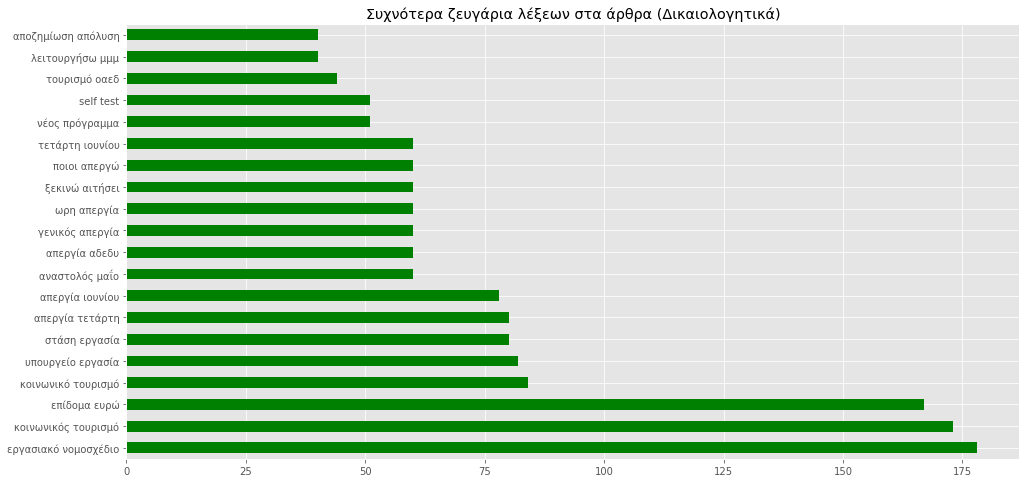

In [ ]:
sum_work_words.sort_values(ascending= False).plot(kind='barh', color='g', grid= True, 
                                                  title= 'Συχνότερα ζευγάρια λέξεων στα άρθρα (Δικαιολογητικά)',
                                                  figsize= (16,8))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= NewStopWords, max_features=20)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['Title']) 


In [ ]:
titles_results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
titles_results.head()

,αδεδυ,αιτήσεις,αλλαγές,αναστολές,απεργία,επίδομα,εργαζομένων,εργασίας,εργασιακό,ευρώ,ιουνίου,κοινωνικός,μμμ,νέα,νομοσχέδιο,οαεδ,παράταση,ποιοι,τετάρτη,τουρισμός
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,1.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.0,0.0,0.0,0.0
2,0.0,0.555131,0.0,0.0,0.0,0.0,0.703427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.44387,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1. 0. 0. ... 0. 0. 0.]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
df_similar = pd.DataFrame(arr)
df_similar

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.579036,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.579036,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,1.000000,0.443870,1.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.512241,0.0,0.383479,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,1.000000,0.443870,1.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.512241,0.0,0.383479,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.512241,...,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.649254,0.496463,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.667119,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.649254,0.496463,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.667119,0.0
2,0.0,0.443870,1.000000,0.443870,0.0,0.575016,0.000000,0.555131,0.0,0.443870,0.583008,0.0,0.170215,0.000000,0.0,0.0,0.0,0.000000,0.443870,0.0,0.443870,1.000000,0.443870,0.0,0.575016,0.000000,0.555131,0.0,0.443870,0.583008,0.0,0.170215,0.000000,0.0,0.0,0.0,0.000000,0.443870,0.0,0.583008,...,0.443870,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.288184,0.565051,0.0,0.443870,0.0,0.314605,0.0,0.000000,0.519435,0.0,0.443870,0.296114,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.288184,0.565051,0.0,0.443870,0.0,0.314605,0.0,0.000000,0.519435,0.0,0.443870,0.296114,0.0
3,0.0,1.000000,0.443870,1.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.512241,0.0,0.383479,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,1.000000,0.443870,1.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.512241,0.0,0.383479,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.512241,...,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.649254,0.496463,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.667119,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.649254,0.496463,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.667119,0.0
4,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.561997,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.561997,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.655982,0.0,0.0,0.441324,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.497911,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.655982,0.0,0.0,0.441324,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.497911,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.000000,0.519435,0.000000,0.0,0.603633,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.674325,0.0,0.0,0.0,0.421034,0.000000,0.0,0.000000,0.519435,0.000000,0.0,0.603633,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.674325,0.0,0.0,0.0,0.421034,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.508965,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.508965,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.0
1996,0.0,0.000000,

In [ ]:
from sklearn.utils.multiclass import unique_labels

In [ ]:
import seaborn as sns

In [ ]:
def plot(df_20_largest):
    labels = unique_labels(df_20_largest)

    table = pd.DataFrame(confusion_matrix(df_20_largest))
    return table

In [ ]:
plot(df_20_largest)

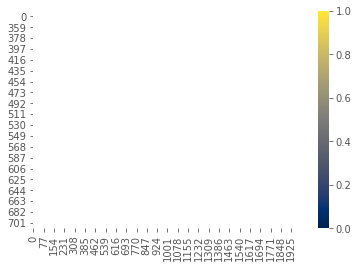

In [ ]:
sns.heatmap(df_20_largest, cmap= 'cividis', linewidths= 2) 


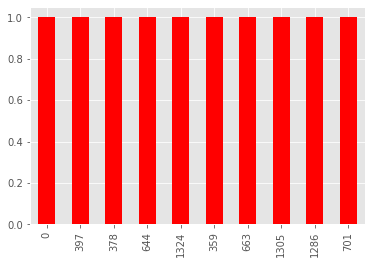

In [ ]:
pd.DataFrame(arr).loc[359].sort_values(ascending = False).head(10).plot(kind = 'bar',color='r')